### Explore Relationship between Covid Cases and Number of Tweets
This was run on Compute Canada platform

#### Come up with weekly state counts for depression, family, and stricter depression. Merge with death count df

In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt

def make_weekly_table(path):
    df = pd.read_csv(path)
    state_count_by_week = []
    total_weeks = 50
    for week in range(total_weeks):
        temp_df = pd.DataFrame(df[df['week']==week]['code'].value_counts())
        temp_df.reset_index(inplace=True)
        temp_df['week'] = week
        state_count_by_week.append(temp_df)
    weekly_state_counts = pd.concat(state_count_by_week)
    weekly_state_counts = weekly_state_counts.rename(columns={"index": "code", "code": "count"})
    return weekly_state_counts
    
weekly_state_counts_all = pd.read_csv('./Stored_Dataframes/weekly_state_counts.csv')
weekly_state_counts_family = make_weekly_table('./Stored_Dataframes/family_related_tweetdf.csv')
weekly_state_counts_depression = make_weekly_table('./Stored_Dataframes/depression_related_tweetdf.csv')
weekly_state_counts_strictdepression = make_weekly_table('./Stored_Dataframes/strict_depression_related_tweetdf.csv')

weekly_state_counts_deaths = pd.read_csv('./Stored_Dataframes/weekly_death_counts_by_state.csv')
weekly_state_counts_deaths = weekly_state_counts_deaths[weekly_state_counts_deaths['week']>=0][weekly_state_counts_deaths['week'] <= 49]
weekly_state_counts_deaths['All Cause'] = weekly_state_counts_deaths['All Cause'].apply(lambda x: int(re.sub("[^0-9]","",x)))
states = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2011_us_ag_exports.csv')
states = states[['code', 'state']]
state_to_code = dict(states[['state', 'code']].values)
code_to_state = dict(states[['code', 'state']].values)

def get_code(state):
    return state_to_code[state] if state in state_to_code else ''
def get_state(code):
    return code_to_state[code] if code in code_to_state else ''

weekly_state_counts_deaths['code'] = weekly_state_counts_deaths['Jurisdiction of Occurrence'].apply(get_code)
weekly_state_counts_deaths = weekly_state_counts_deaths[weekly_state_counts_deaths['code'] != '']

weekly_state_counts_all = pd.merge(weekly_state_counts_all, weekly_state_counts_deaths, on=['week', 'code'])
weekly_state_counts_all = weekly_state_counts_all.rename(columns={"Jurisdiction of Occurrence": "state", "All Cause": "deaths"})
# weekly_state_counts_all

weekly_state_counts_family = pd.merge(weekly_state_counts_family, weekly_state_counts_deaths, on=['week', 'code'])
weekly_state_counts_family = weekly_state_counts_family.rename(columns={"Jurisdiction of Occurrence": "state", "All Cause": "deaths"})
# weekly_state_counts_family

weekly_state_counts_depression = pd.merge(weekly_state_counts_depression, weekly_state_counts_deaths, on=['week', 'code'])
weekly_state_counts_depression = weekly_state_counts_depression.rename(columns={"Jurisdiction of Occurrence": "state", "All Cause": "deaths"})
# weekly_state_counts_depression

weekly_state_counts_strictdepression = pd.merge(weekly_state_counts_strictdepression, weekly_state_counts_deaths, on=['week', 'code'])
weekly_state_counts_strictdepression = weekly_state_counts_strictdepression.rename(columns={"Jurisdiction of Occurrence": "state", "All Cause": "deaths"})
# weekly_state_counts_strictdepression

<ipython-input-1-535148a89074>:24: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  weekly_state_counts_deaths = weekly_state_counts_deaths[weekly_state_counts_deaths['week']>=0][weekly_state_counts_deaths['week'] <= 49]


#### All Tweets vs Deaths for Any State

Enter State: Texas


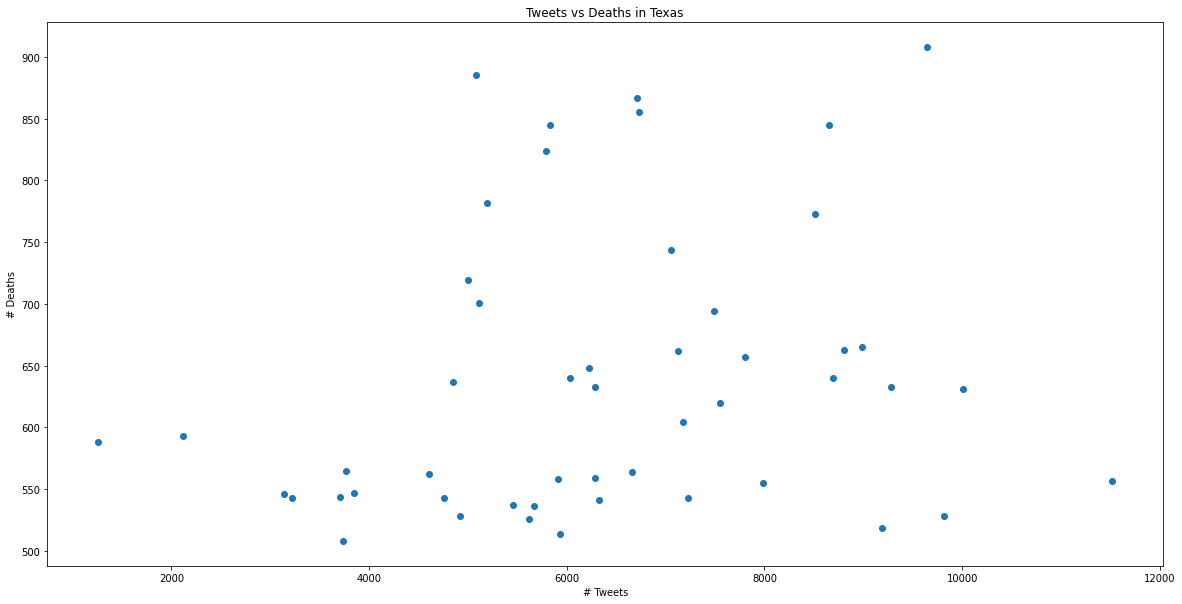

In [10]:
state = input("Enter State: ")
# statistic = int(input("Enter 0 for all tweets, 1 for family related tweets, 2 for depression related tweets and 3 for strict depression related tweets"))
# num_to_stat = {0: 'count', 1: 'family_count', 2: 'depression_count', 3: 'strict_depression_count'}
plt.figure(figsize=(20,10))
plt.scatter(weekly_state_counts_all[weekly_state_counts_all['code']==get_code(state)]['count'], weekly_state_counts_all[weekly_state_counts_all['code']=='NV']['deaths'])
plt.title("Tweets vs Deaths in " + state)
plt.xlabel("# Tweets")
plt.ylabel("# Deaths")
plt.show()

#### Family Tweets vs Deaths for Any State

Enter State: Texas


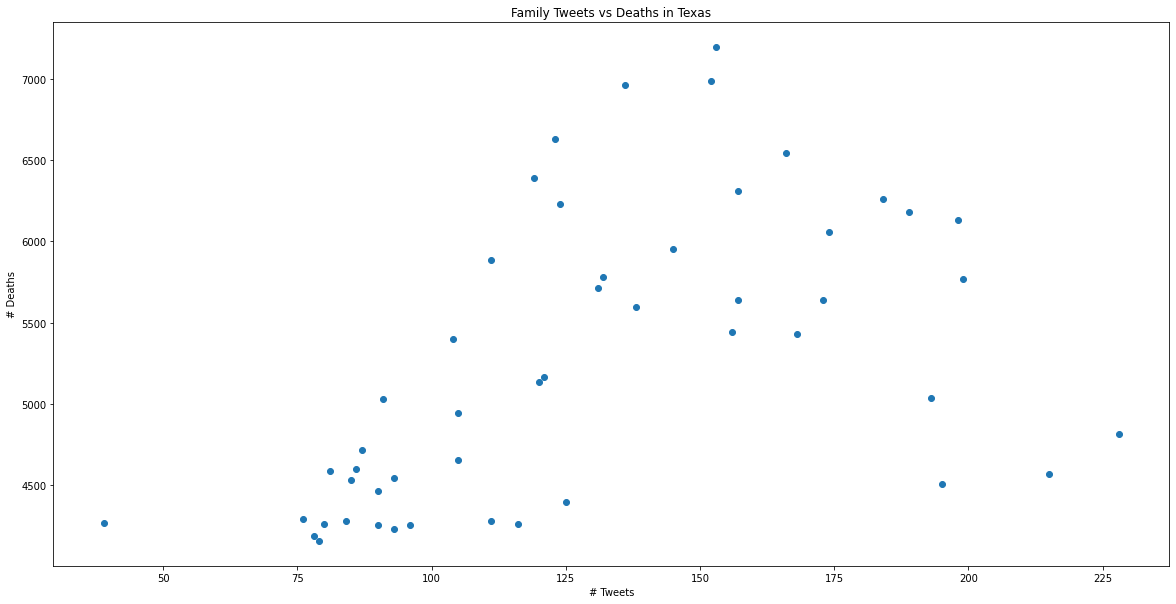

In [2]:
state = input("Enter State: ")
# statistic = int(input("Enter 0 for all tweets, 1 for family related tweets, 2 for depression related tweets and 3 for strict depression related tweets"))
# num_to_stat = {0: 'count', 1: 'family_count', 2: 'depression_count', 3: 'strict_depression_count'}
plt.figure(figsize=(20,10))
plt.scatter(weekly_state_counts_family[weekly_state_counts_family['code']==get_code(state)]['count'], weekly_state_counts_family[weekly_state_counts_family['code']==get_code(state)]['deaths'])
plt.title("Family Tweets vs Deaths in " + state)
plt.xlabel("# Tweets")
plt.ylabel("# Deaths")
plt.show()

#### Depression Tweets vs Deaths for Any State

Enter State: California


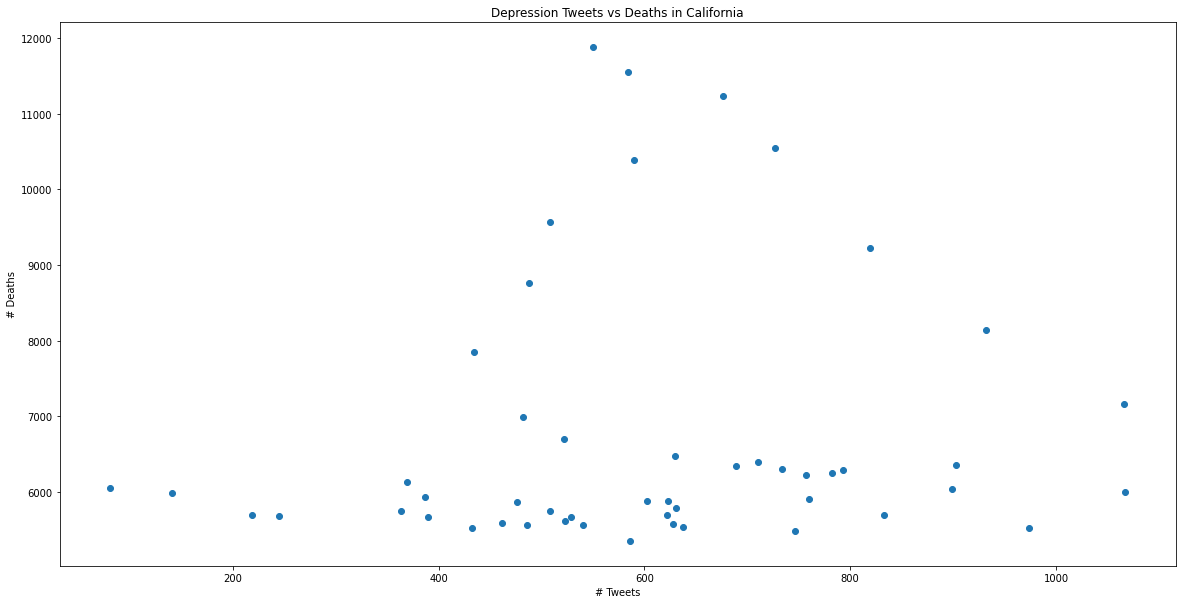

In [12]:
state = input("Enter State: ")
# statistic = int(input("Enter 0 for all tweets, 1 for family related tweets, 2 for depression related tweets and 3 for strict depression related tweets"))
# num_to_stat = {0: 'count', 1: 'family_count', 2: 'depression_count', 3: 'strict_depression_count'}
plt.figure(figsize=(20,10))
plt.scatter(weekly_state_counts_depression[weekly_state_counts_depression['code']==get_code(state)]['count'], weekly_state_counts_depression[weekly_state_counts_depression['code']==get_code(state)]['deaths'])
plt.title("Depression Tweets vs Deaths in " + state)
plt.xlabel("# Tweets")
plt.ylabel("# Deaths")
plt.show()

#### Stricter Depression Tweets vs Deaths

Enter State: Oregon


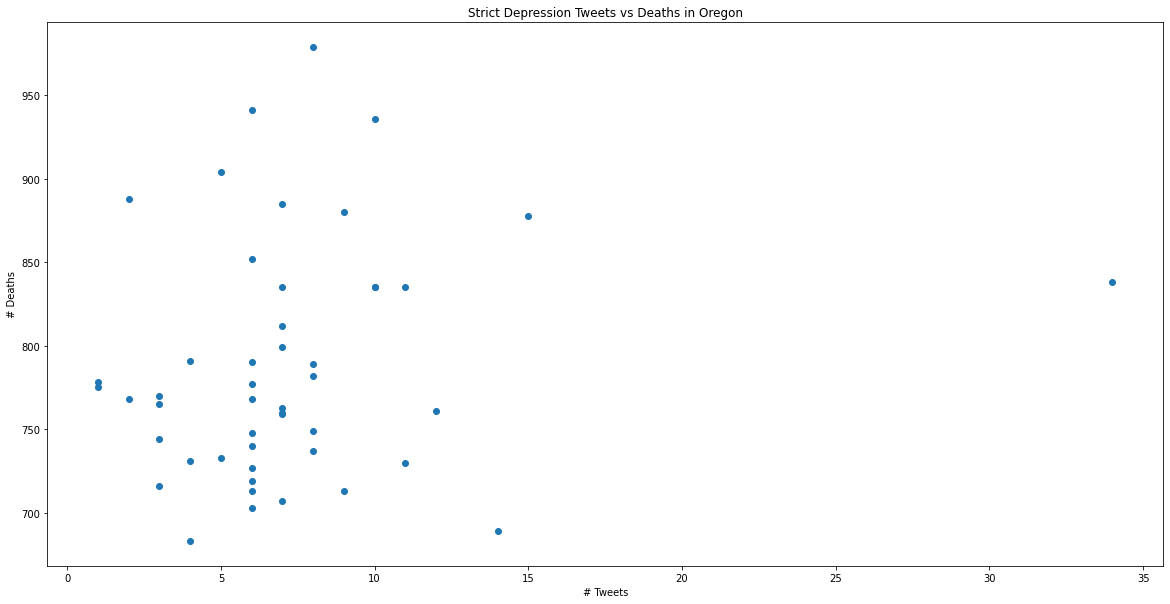

In [3]:
state = input("Enter State: ")
# statistic = int(input("Enter 0 for all tweets, 1 for family related tweets, 2 for depression related tweets and 3 for strict depression related tweets"))
# num_to_stat = {0: 'count', 1: 'family_count', 2: 'depression_count', 3: 'strict_depression_count'}
plt.figure(figsize=(20,10))
plt.scatter(weekly_state_counts_strictdepression[weekly_state_counts_strictdepression['code']==get_code(state)]['count'], weekly_state_counts_strictdepression[weekly_state_counts_strictdepression['code']==get_code(state)]['deaths'])
plt.title("Strict Depression Tweets vs Deaths in " + state)
plt.xlabel("# Tweets")
plt.ylabel("# Deaths")
plt.show()

#### Merge weekly state count df with population to obtain normalized counts

In [70]:
populations = pd.read_excel("./Data/populations.xlsx")
populations['code'] = populations['State'].apply(get_code)
del populations["Unnamed: 2"]
populations

def merge_with_population(df):
    rdf = pd.merge(df, populations, on="code")
    del rdf['State']
    rdf['normalized_counts'] = rdf['count']/rdf['July 2019 Estimate']
    return rdf
weekly_state_counts_family = merge_with_population(weekly_state_counts_family)
weekly_state_counts_depression = merge_with_population(weekly_state_counts_depression)
weekly_state_counts_strictdepression = merge_with_population(weekly_state_counts_strictdepression)
weekly_state_counts_family

,code,count,week,state,deaths,July 2019 Estimate,normalized_counts
0,CA,136,0,California,5681,39512223,3.441973e-06
1,CA,129,1,California,5689,39512223,3.264813e-06
2,CA,80,2,California,5986,39512223,2.024690e-06
3,CA,41,3,California,6047,39512223,1.037654e-06
4,CA,110,4,California,6131,39512223,2.783949e-06
...,...,...,...,...,...,...,...
2323,MT,1,44,Montana,247,1068778,9.356480e-07
2324,MT,3,45,Montana,199,1068778,2.806944e-06
2325,MT,2,46,Montana,216,1068778,1.871296e-06
2326,MT,1,48,Montana,210,1068778,9.356480e-07


#### Store weekly state count dfs from above to use in StatePlot locally (since plotly doesn't work here)

In [77]:
weekly_state_counts_all.to_csv('./Stored_Dataframes/weekly_state_counts_all.csv')
weekly_state_counts_family.to_csv('./Stored_Dataframes/weekly_state_counts_family.csv')
weekly_state_counts_depression.to_csv('./Stored_Dataframes/weekly_state_counts_depression.csv')
weekly_state_counts_strictdepression.to_csv('./Stored_Dataframes/weekly_state_counts_strictdepression.csv')